In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

classificador = Sequential()
classificador.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
gerador_teste = ImageDataGenerator(rescale = 1./255)

base_treinamento = gerador_treinamento.flow_from_directory('dataset/train',
                                                           target_size = (64,64),
                                                           batch_size = 32,
                                                           class_mode = 'categorical')
base_teste = gerador_teste.flow_from_directory('dataset/valid',
                                               target_size = (64,64),
                                               batch_size = 32,
                                               class_mode = 'categorical')

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = classificador.fit_generator(base_treinamento, steps_per_epoch = 2,
                            epochs = 100, validation_data = base_teste,
                            validation_steps = 2,
                            callbacks=[cp_callback])

Found 116 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 0.7760 - accuracy: 0.6154


Epoch 1: saving model to training_1/cp.ckpt
2/2 [==============================] - 2s 577ms/step - loss: 0.7760 - accuracy: 0.6154 - val_loss: 0.6496 - val_accuracy: 0.7500
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 0.8504 - accuracy: 0.7212
Epoch 2: saving model to training_1/cp.ckpt
2/2 [==============================] - 0s 210ms/step - loss: 0.8504 - accuracy: 0.7212
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 0.7772 - accuracy: 0.6250
Epoch 3: saving model to training_1/cp.ckpt
2/2 [==============================] - 0s 261ms/step - loss: 0.7772 - accuracy: 0.6250
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 0.8422 - accuracy: 0.6538
Epoch 4: saving model to training_1/cp.ckpt
2/2 [==============================] - 0s 251ms/step - loss: 0.8422 - accuracy: 0.6538
Epoch 5/100
2/2 [==============================] - ETA: 0s - loss: 0.8279 - accuracy: 0.6923
Epoch 5: saving model to training_1/cp.ckpt
2/2 [============

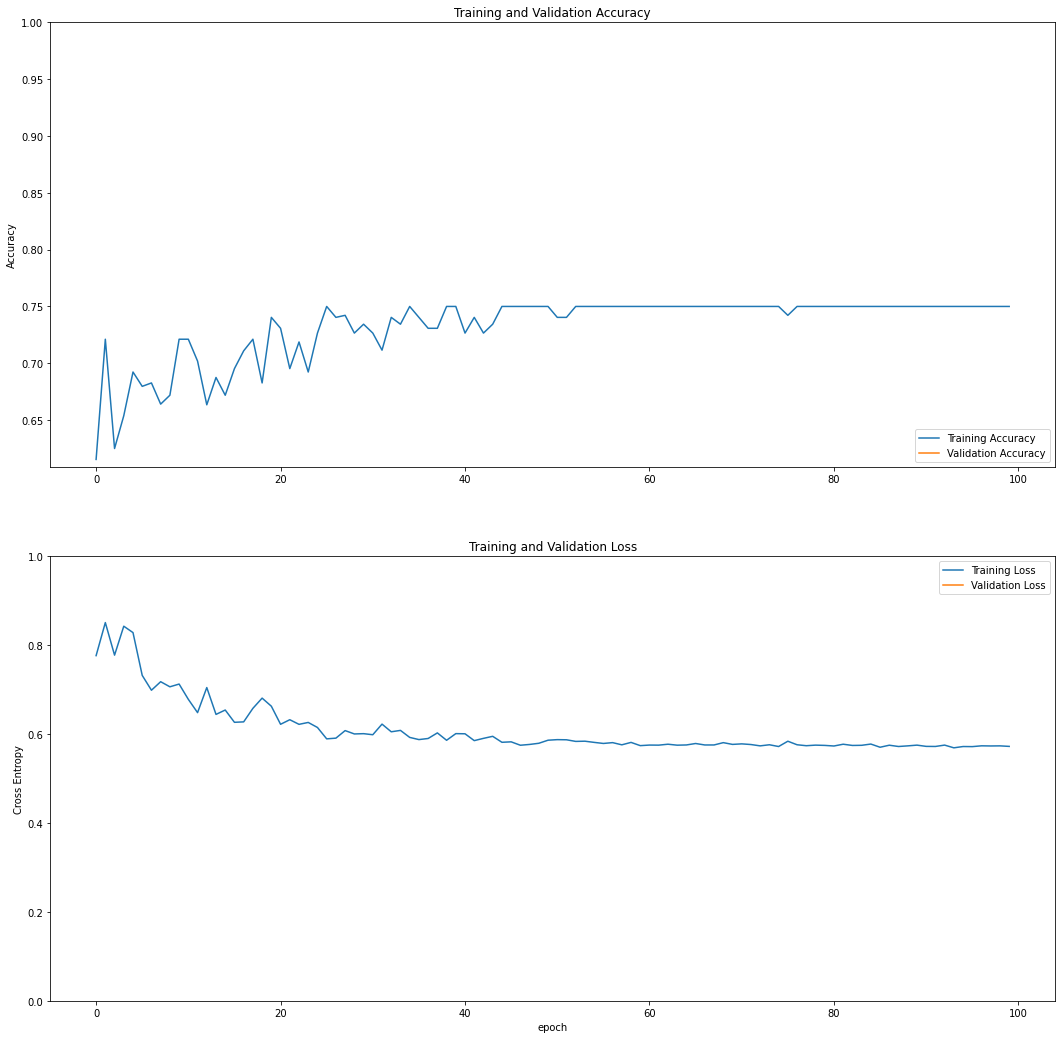

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(18, 18))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()